In [8]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2021', data_source='yahoo')
print(goog)


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
%config InlineBackend.figure_format = 'svg'

                   High          Low         Open        Close     Volume  \
Date                                                                        
2014-03-27   566.445129   551.406372   566.445129   556.931213    13087.0   
2014-03-28   564.879395   557.140625   559.713562   558.457031    41115.0   
2014-03-31   565.447815   555.405396   565.338135   555.445312    10801.0   
2014-04-01   566.893860   557.180542   557.180542   565.607422     7953.0   
2014-04-02   603.174316   560.651001   579.170166   565.447815   147099.0   
...                 ...          ...          ...          ...        ...   
2020-12-24  1746.000000  1729.109985  1735.000000  1738.849976   346753.0   
2020-12-28  1790.727539  1746.334961  1751.635010  1776.089966  1393033.0   
2020-12-29  1792.439941  1756.089966  1787.790039  1758.719971  1299395.0   
2020-12-30  1765.094971  1725.599976  1762.010010  1739.520020  1306130.0   
2020-12-31  1758.930054  1735.420044  1735.420044  1751.880005  1012240.0   

In [10]:
print(pd.date_range('2021-11-01', periods=10, freq='M'))

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')


In [11]:
print(pd.date_range('2021-11-01', periods=10, freq='BM'))

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [15]:
print(pd.date_range('2021-11-01', periods=10, freq='BAS'))

DatetimeIndex(['2022-01-03', '2023-01-02', '2024-01-01', '2025-01-01',
               '2026-01-01', '2027-01-01', '2028-01-03', '2029-01-01',
               '2030-01-01', '2031-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')


In [19]:
print(pd.date_range('2021-11-01', periods=10, freq='1H30T'))

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 01:30:00',
               '2021-11-01 03:00:00', '2021-11-01 04:30:00',
               '2021-11-01 06:00:00', '2021-11-01 07:30:00',
               '2021-11-01 09:00:00', '2021-11-01 10:30:00',
               '2021-11-01 12:00:00', '2021-11-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')


In [22]:
from pandas.tseries.offsets import DateOffset

ts = pd.Timestamp('2021-10-31 23:28:30')
ts - DateOffset(years=71, months=4, days=5, hours=19, minutes=28, seconds=30)

Timestamp('1950-06-25 04:00:00')

In [32]:
goog.resample('Q').mean()
goog.resample('H').max()

Date
2014-03-27 00:00:00     556.931213
2014-03-27 01:00:00            NaN
2014-03-27 02:00:00            NaN
2014-03-27 03:00:00            NaN
2014-03-27 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 59305, dtype: float64

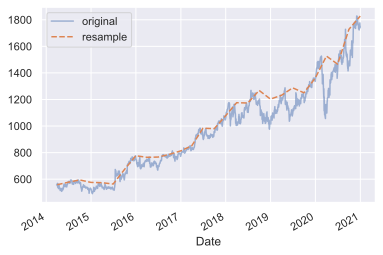

In [35]:
goog.plot(alpha=0.5, style='-') 

goog.resample('Q').max().plot(style='--')

plt.legend(['original', 'resample'], loc='upper left');

In [39]:
goog.shift(900)

Date
2014-03-27           NaN
2014-03-28           NaN
2014-03-31           NaN
2014-04-01           NaN
2014-04-02           NaN
                 ...    
2020-12-24    964.859985
2020-12-28    966.950012
2020-12-29    975.599976
2020-12-30    983.679993
2020-12-31    976.570007
Name: Close, Length: 1705, dtype: float64

<ipython-input-41-fa172bb31d3a>:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


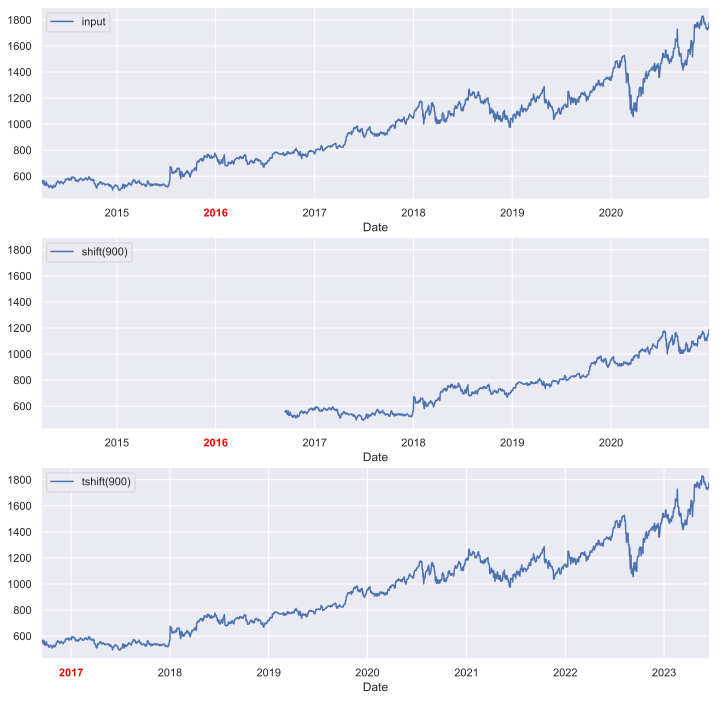

In [41]:
fig, ax = plt.subplots(3, sharey=True, figsize=(12, 12))

goog = goog.asfreq('D', method='pad') # 'pad' = forward fill NaN values

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

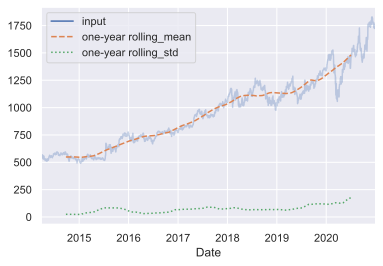

In [42]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)